In [1]:
# import necessary library
import pandas as pd
import os

In [2]:
# Reading one of the dataset

df = pd.read_csv("/content/drive/My Drive/CSV files for Deep learning and ML/Sales Analysis/Sales_April_2019.txt")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.shape

(18383, 6)

In [5]:
# Reading 12 months of sales data in a single file (searched on stackoverflow [read all files from directory])

files1 = [files for files in os.listdir("/content/drive/My Drive/CSV files for Deep learning and ML/Sales Analysis")] 

for files in files1:
  print (files)

Sales_April_2019.txt
Sales_August_2019.txt
Sales_December_2019.txt
Sales_February_2019.txt
Sales_January_2019.txt
Sales_July_2019.txt
Sales_June_2019.txt
Sales_March_2019.txt
Sales_May_2019.txt
Sales_November_2019.txt
Sales_October_2019.txt
Sales_September_2019.txt


In [6]:
# Merging all the 12 files together (searched on stackoverflow [how to concatenate datasets together])

all_months_data = pd.DataFrame()
for files in files1:
  df = pd.read_csv("/content/drive/My Drive/CSV files for Deep learning and ML/Sales Analysis/"+files)
  all_months_data = pd.concat([all_months_data, df])

  all_months_data.head()

In [7]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
all_months_data.shape

(186850, 6)

The dataset has 1,86,850 rows hence we can say that the month-on-month datasets have been merged

In [9]:
# To check if the datasets have merged or concatenated

all_months_data.to_csv("all_data.csv", index = False) # check the entries in the csv files to see if all months have been merged

In [10]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Cleaning up the data

In [11]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
# Displaying all rows with one or more NaN values

nan_df = all_months_data[all_months_data.isnull().any(axis = 1)]

In [13]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop all the rows with NaN values

all_months_data = all_months_data.dropna(how = "all")

In [15]:
all_months_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
# There are some rows in which Month == Or
temp_df = all_months_data[all_months_data["Order Date"].str[0:2] == "Or"]

In [17]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
# drop all rows with Month == Or

all_data = all_months_data[all_months_data["Order Date"].str[0:2] != "Or"]

### Q1. What was the best month of sales? How much was earned that month?

In [19]:
# Task 1: Create a seperate column for month
all_data["Month"] = all_data["Order Date"].str[0:2] # Order Date is a string and not in date time format yet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [21]:
# Month feature is a string right now and hence we convert it to integer

all_data["Month"] = all_data["Month"].astype("int32")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


 - Hence we have converted Month feature to Integer

In [23]:
# Task 2: Add A Sales Column
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32") # using astype method
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) # using to_numeric method
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


- From eye balling, we can say that Month 12 that is December is the Best Month for sales which made $4.6 million.

- January is the worst month for sales which made $1.8 million

In [26]:
# Plotting the results on the graph [Bar Plot]

import matplotlib.pyplot as plt


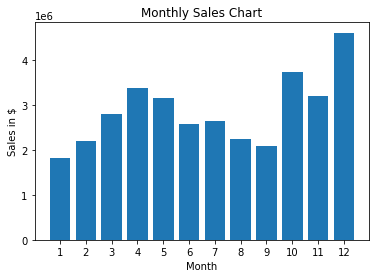

In [27]:
results = all_data.groupby("Month").sum()
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in $")
plt.title("Monthly Sales Chart")
plt.show()

###### From this graph, we can try to question as to why did we perform better in some months like april and december and why did we perform poorly in some months?

###### Did we spend more in a particular area say sales and marketing or what else could be the reason which led to better results?


### Q2. What city has the highest number of sales?



In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
# Task 3: Create a new City column
# We will use the .apply() method and remove the city which is placed between 2 commas

all_data["City"] = all_data["Purchase Address"].apply(lambda x : x.split(",")[1]) # split at comma and get the word at 1st index
                                                                                  # labda x is used to grab the content of each row
all_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [30]:
# Getting the annual sales in each city
all_data.groupby("City").sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


#### From the table above, we can say that highest sales is obtained from San Francisco which is $8.2 million

#### Lowest Sales is obtained from Austin which is $1.8 million

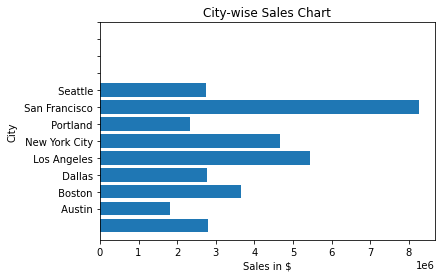

In [31]:
# plotting the results on the graph
results = all_data.groupby("City").sum()

city_sales = pd.DataFrame(results) # The city names are the index
city_sales["City"] = city_sales.index # So we create a new dataset of results and add city as a new column

# Horizontal Bar Plot 
plt.barh(city_sales["City"], city_sales["Sales"])
plt.yticks(months)
plt.xlabel("Sales in $")
plt.ylabel("City")
plt.title("City-wise Sales Chart")
plt.show()

#### We observe that, in some cells, the name of the city is the same but the states are different.
#### This means that some states may have the same city names.

### **Hence we also have to extract states with cities to make correct analysis**

In [32]:
def get_city(address):
  return address.split(",")[1]

def get_state(address):
  return address.split(",")[2]

all_data["City_n_State"] = all_data["Purchase Address"].apply(lambda x : get_city(x) + " " + get_state(x) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA 90001


In [34]:
# getting rid of zip code in City_n_State 
# Here we will split at white spaces as there is white space btw state and zip code in Address column

def get_city(address):
  return address.split(",")[1]

def get_state(address):
  return address.split(",")[2].split(" ")[1] # splitting at white space (index 1 is used as there is a white space before and after state name)

all_data["City_n_State"] = all_data["Purchase Address"].apply(lambda x : get_city(x) + "(" + get_state(x) + ")" )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA)


In [36]:
# Getting the annual sales in each city with state

results = all_data.groupby("City_n_State").sum()

In [37]:
results.head(10)

,Quantity Ordered,Price Each,Month,Sales
City_n_State,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


### Here we can observe that Portland is in 2 states. Hence our analysis is successful now

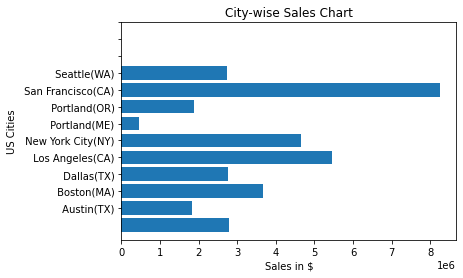

In [38]:
# plotting the results on the graph
results = all_data.groupby("City_n_State").sum()

city_sales = pd.DataFrame(results) # The city names are the index
city_sales["City_n_State"] = city_sales.index # So we create a new dataset of results and add city as a new column

# Horizontal Bar Plot 
plt.barh(city_sales["City_n_State"], city_sales["Sales"])
plt.yticks(months)
plt.xlabel("Sales in $")
plt.ylabel("US Cities")
plt.title("City-wise Sales Chart")
plt.show()

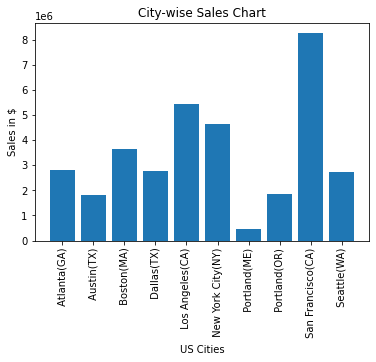

In [39]:
city_sales = pd.DataFrame(results) # The city names are the index
city_sales["City_n_State"] = city_sales.index # So we create a new dataset of results and add city as a new column

# Vertical Bar Plot 
plt.bar(city_sales["City_n_State"], city_sales["Sales"])
plt.ylabel("Sales in $")
plt.xlabel("US Cities")
plt.xticks(city_sales["City_n_State"], rotation = "vertical", size = 10)
plt.title("City-wise Sales Chart")
plt.show()

### Looking at this data, as a data scientist we can ask questions like why is the sales so high in San Francisco and come up with hypothesis to validate our data like people in San Francisco has more money and so on

### Q3. What time should we display the advertisements to maximize the likelihood of customer's buying the product?

#### Ans. To answer this question, we will be making use of "Order Date" Feature. We will see their distribution during the 24 hr period as to see at what time are most of the products ordered and then give adds at that time.  

In [40]:
# Convert the Order Date feature to datetime from string (All the data in a dataset is in string format coz it acquires less space than numeric and datetime format data)

all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA)


In [42]:
# Extracting Hours and Minutes from Order Date

all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA),9,27


In [44]:
results = all_data.groupby("Hour").sum()

In [45]:
results.head()

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876


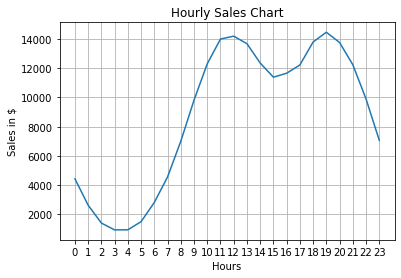

In [46]:
# Plotting the hourly sales results on a graph

hourly_sales = pd.DataFrame(results) # The city names are the index
hourly_sales["Hour"] = hourly_sales.index # So we create a new dataset of results and add city as a new column

# Vertical Bar Plot 
plt.plot(hourly_sales["Hour"], hourly_sales["Quantity Ordered"])
plt.ylabel("Sales in $")
plt.xlabel("Hours")
plt.xticks(hourly_sales["Hour"])
plt.grid()
plt.title("Hourly Sales Chart")
plt.show()

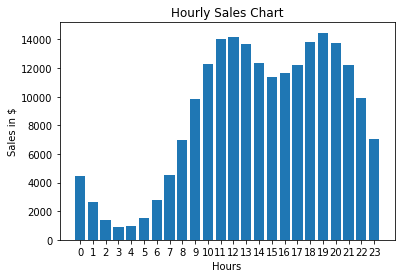

In [47]:
hourly_sales = pd.DataFrame(results) # The city names are the index
hourly_sales["Hour"] = hourly_sales.index # So we create a new dataset of results and add city as a new column

# Vertical Bar Plot 
plt.bar(hourly_sales["Hour"], hourly_sales["Quantity Ordered"])
plt.ylabel("Sales in $")
plt.xlabel("Hours")
plt.xticks(hourly_sales["Hour"])
plt.title("Hourly Sales Chart")
plt.show()

### Ans. Looking at the graph we can answer our question by saying that we should post our ads at 11 A.M, 12 P.M, 1 P.M and in the evening between 6 P.M to 9 P.M

### Q4. What products are often sold together??

#### For this question, we will make use of the "Order_id" If the products have the same order id then they are sold together. Hence by calculating the duplicate order ids we will get the answer

In [49]:
#All the duplicate orders are combined together and single orders are removed
df = all_data[all_data["Order ID"].duplicated(keep = False)]

In [50]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles(CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston(MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston(MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,San Francisco(CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,San Francisco(CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,New York City(NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,New York City(NY),11,7


In [55]:
# Grouping the duplicates together

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x : ", ".join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_n_State,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA),14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles(CA),14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles(CA),19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles(CA),19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston(MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston(MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,San Francisco(CA),17,0,"AAA Batteries (4-pack), Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,San Francisco(CA),17,0,"AAA Batteries (4-pack), Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,New York City(NY),11,7,"Lightning Charging Cable, USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,New York City(NY),11,7,"Lightning Charging Cable, USB-C Charging Cable"


### Now that we have grouped the same Order ID together, we can see that there are 2 or 3 records for each order id (Refer Grouped Column of above dataset)

### Hence We will drop the duplicate occurances of the same order.

In [59]:
# Drop duplicate orders
df = df[["Order ID","Grouped"]].drop_duplicates()

In [60]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [61]:
from itertools import combinations
from collections import Counter

count = Counter()

#Creating a list of list for Grouped column and counting the most common bought together items
for row in df["Grouped"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list, 2))) # most common 2 items bought together. We can also look at 3 items


In [62]:
count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

In [63]:
# Better visualizing the most common items

for key, value in count.most_common(10):
  print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


## Above, we can see that IPhone and Lightning Charging Cable were the most commonly sold together items. So we can make a offer on IPhone like "Buy an IPhone and get a Lightning Charging Cable at 10% OFF!!" 

## Q5. Which Was The Most Commonly Sold Item & Why??

In [66]:
product_count = all_data.groupby("Product")

In [67]:
product_count.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [69]:
quantity_ordered = product_count.sum()["Quantity Ordered"]

In [70]:
# Creating a Bar chart for most commonly brought products

product = [product for product, df in product_count]

In [71]:
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

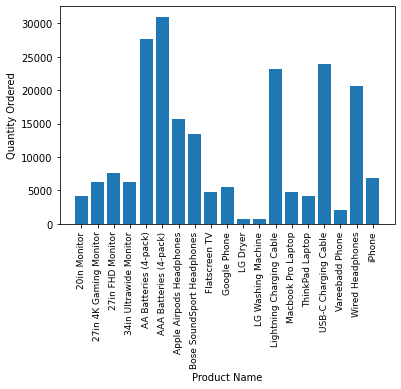

In [76]:
plt.bar(product, quantity_ordered)
plt.xticks(product, rotation = "vertical", size = 9)
plt.xlabel("Product Name")
plt.ylabel("Quantity Ordered")
plt.show()

### 1. We can see that AAA Batteries and Lightning Charging Cable are the most sold Items
### 2. LG Washing Machine and Dryer are the least sold Item

## - The main reason for this could be that AAA Batteries are Cheap but LG dryers are very expensive. 

### We will prove this by overlaying the price graph on the quantity ordered graph

In [77]:
# Calculating the cost of a single quantity of a product
prices = all_data.groupby("Product").mean()["Price Each"]

In [78]:
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


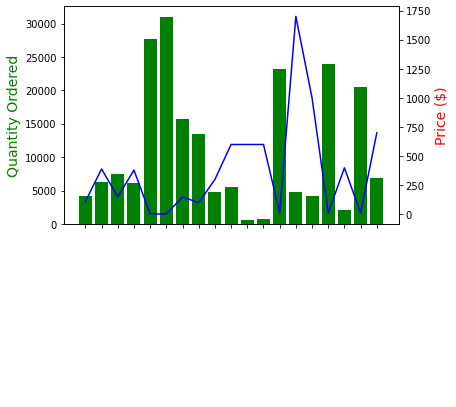

In [90]:
#Plotting a Combined Graph
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color = "g")
ax2.plot(product, prices, "b-")

ax1.set_xlabel("Product Name", color = "w", size = 14)
ax1.set_ylabel("Quantity Ordered", color = "g", size = 14)
ax2.set_ylabel("Price ($)", color = "r", size = 14)
ax1.set_xticklabels(product, rotation = "vertical", size = 10, color = "w")

plt.show()